# Prediccion de demanda sobre ventas de comida

**Tarea a realizar:**

Una empresa de entrega de comidas que opera en varias ciudades, tiene varios centros logísticos en estas ciudades para enviar pedidos de comida a sus clientes quiere que usted ayude a estos centros con la previsión de la demanda para las próximas semanas, de esta manera, hará que los centros planifiquen mejor el stock de materias primas en consecuencia. Logrando así, reducir las pérdidas, optimizando los costos.

Dada la siguiente información, la tarea es predecir la demanda durante las próximas 10 semanas (semanas: 146-155) para las combinaciones de comida central en el conjunto de prueba.

**Aclaración:**

Cabe aclarar que este notebook solo muestra la idea principal de la tarea a desarrollar. Esto se ampliará con los distintos productos de la empresa para crear una aplicación funcional para mostrar los resultados.

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [59]:
# Agrupar los datos por semana y sumar las ventas
ventas_por_semana = train.groupby('week')['num_orders'].sum().reset_index()

# Renombrar las columnas para mayor claridad
ventas_por_semana.columns = ['week', 'sum_num_orders']

# Mostrar el nuevo DataFrame
ventas_por_semana

,week,sum_num_orders
0,1,792261
1,2,787084
2,3,695262
3,4,743529
4,5,1198675
...,...,...
140,141,776240
141,142,739661
142,143,759926
143,144,801197


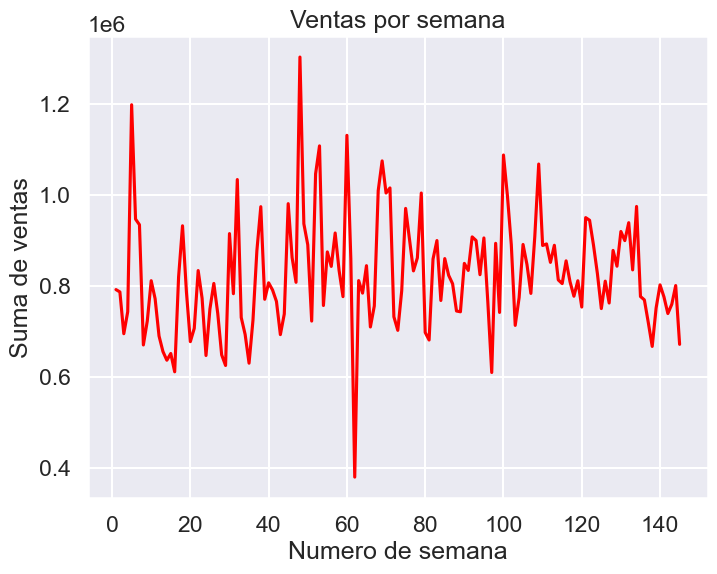

In [60]:
# Graficar las ventas por semana
plt.figure(figsize=(8, 6)) # 800x600 px
# plt.scatter(ventas_por_semana['week'], ventas_por_semana['sum_num_orders'], color='deeppink')
plt.plot(ventas_por_semana['week'], ventas_por_semana['sum_num_orders'], color='red')
plt.title('Ventas por semana')
plt.xlabel('Numero de semana')
plt.ylabel('Suma de ventas')
plt.grid(True)
plt.show()

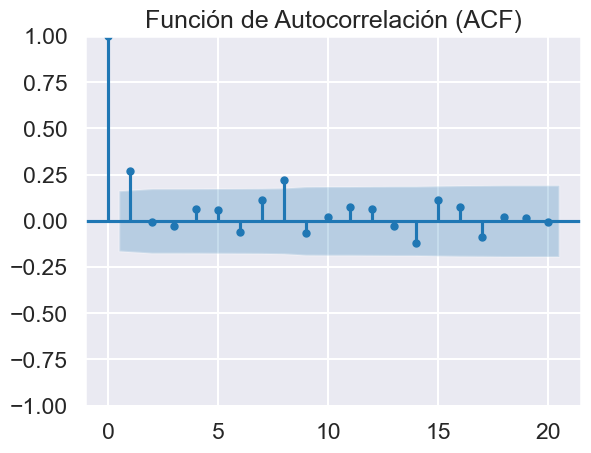

In [61]:
from statsmodels.graphics.tsaplots import plot_acf

## Gráfico de la función de autocorrelación (ACF)
plot_acf(ventas_por_semana['sum_num_orders'], lags=20)
plt.title('Función de Autocorrelación (ACF)')
plt.show()

In [62]:
from pmdarima import auto_arima

# Supongamos que tienes una serie temporal llamada 'serie_temporal'

# Utiliza auto_arima para encontrar los mejores parámetros del modelo ARIMA
modelo_auto = auto_arima(ventas_por_semana['sum_num_orders'], seasonal=True, m=8)  # m es la frecuencia estacional

# Imprime un resumen del modelo ajustado
print(modelo_auto.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  145
Model:             SARIMAX(0, 0, 2)x(0, 0, 2, 8)   Log Likelihood               -1894.618
Date:                           Thu, 25 Apr 2024   AIC                           3801.237
Time:                                   22:04:41   BIC                           3819.097
Sample:                                        0   HQIC                          3808.494
                                           - 145                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   8.222e+05   2.52e+04     32.650      0.000    7.73e+05    8.72e+05
ma.L1          0.3537      0.101      3.516

In [63]:
pronostico = modelo_auto.predict_in_sample()
pronostico

0      822235.010948
1      811853.568796
2      810449.736641
3      778713.302111
4      796603.011121
           ...      
140    807266.090168
141    869459.592910
142    743348.844945
143    815387.487537
144    773650.784413
Name: predicted_mean, Length: 145, dtype: float64

In [64]:
# Número de semanas para pronosticar
num_semanas = 10

# Obtén las predicciones para las próximas 10 semanas
pronostico_prox_semanas = modelo_auto.predict(n_periods=num_semanas)

In [65]:
# Supongamos que ya has ejecutado el pronóstico para las próximas 10 semanas
fitted, confint = modelo_auto_final.predict(n_periods=num_semanas, return_conf_int=True)

# Extrae los límites inferior y superior del intervalo de confianza
confianza_inf = confint[:, 0]
confianza_sup = confint[:, 1]

c:\Users\matia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\matia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\matia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\matia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

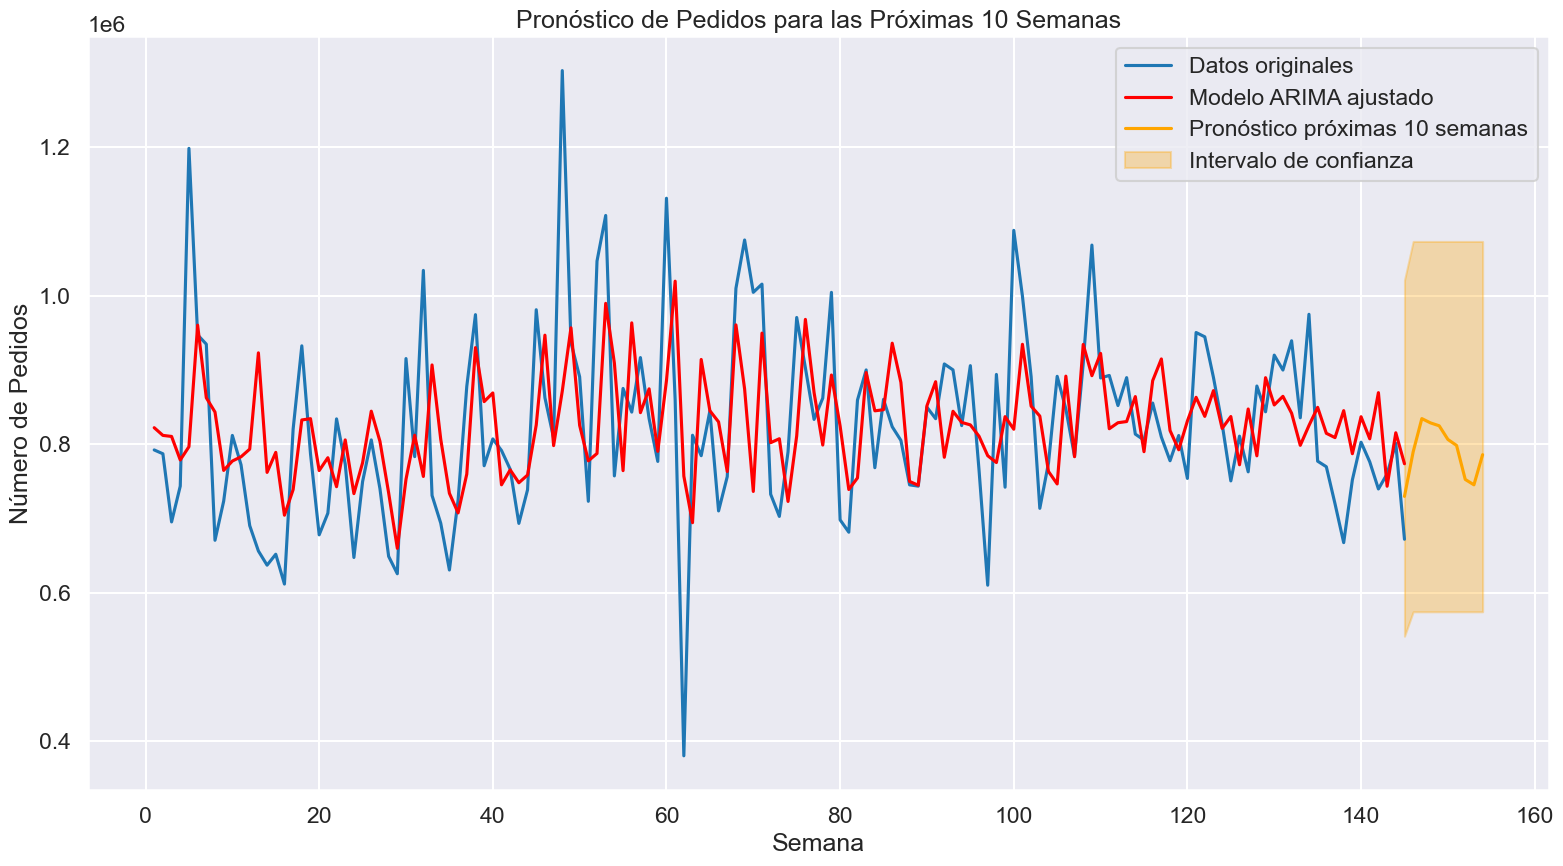

In [66]:
import seaborn as sns

plt.figure(figsize=(16, 9)) # 800x600 px

# Establece el estilo y el contexto de Seaborn
sns.set_style("darkgrid")
sns.set_context("talk")

# Crea un rango de índices para las próximas 10 semanas
indice_prox_semanas = np.arange(len(ventas_por_semana), len(ventas_por_semana) + num_semanas)

# Grafica los datos originales
sns.lineplot(x=ventas_por_semana['week'], y=ventas_por_semana['sum_num_orders'], label='Datos originales')

# Visualiza el modelo ARIMA ajustado
sns.lineplot(x=ventas_por_semana['week'], y=pronostico, color='red', label='Modelo ARIMA ajustado')

# Grafica las predicciones para las próximas 10 semanas
sns.lineplot(x=indice_prox_semanas, y=pronostico_prox_semanas, color='orange', label='Pronóstico próximas 10 semanas')

# Rellena el área entre los límites inferior y superior del intervalo de confianza
plt.fill_between(indice_prox_semanas, 
                 confianza_inf, 
                 confianza_sup, 
                 color='orange', alpha=.3, label='Intervalo de confianza')

plt.legend()
plt.title('Pronóstico de Pedidos para las Próximas 10 Semanas')
plt.xlabel('Semana')
plt.ylabel('Número de Pedidos')
plt.tight_layout()  # Ajusta el diseño para evitar que los elementos se superpongan
plt.show()

In [67]:
# Error de Porcentaje Absoluto Medio (MAPE)
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_score = mape(ventas_por_semana['sum_num_orders'], pronostico)
print("MAPE:", mape_score)

# Correlación entre los valores reales y pronosticados (corr)
corr = np.corrcoef(ventas_por_semana['sum_num_orders'], pronostico)[0, 1]
print("Correlación:", corr)

MAPE: 10.586936856143101
Correlación: 0.4176892852889774
